In [34]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [38]:
#99709 is the ZIP code for Fairbanks, Alaska
alaska = pd.read_csv("99709.csv")
alaska_copy = alaska.copy
alaska_copy['date_time'] = alaska_copy['date_time'].datetime.strptime(date_time_str, %m/%d/Y %H:%M)


SyntaxError: invalid syntax (<ipython-input-38-dbfac80b0d0b>, line 4)

In [37]:




# This will tell us about the df
print("There are",len(alaska)-1,"observations in df.")
print("The columns are",list(alaska.columns))

# Look at 5 randomly sampled rows
alaska.sample(5)

There are 36535 observations in df.
The columns are ['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location']


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
4482,-28,-29,0.0,4.9,2,12,12:00 AM,12:00 AM,11:35 AM,4:26 PM,...,24,2,93,0.0,1012,-29,10,45,14,99709
1707,-22,-23,1.3,1.7,1,27,10:33 AM,No moonset,10:42 AM,5:29 PM,...,13,100,98,0.4,999,-23,2,256,9,99709
2528,10,1,0.0,16.8,3,68,4:41 AM,6:03 AM,4:34 AM,11:05 PM,...,13,29,76,0.0,1020,4,10,352,7,99709
20556,14,12,0.0,-3.4,3,5,3:38 AM,10:06 PM,3:49 AM,12:06 AM,...,13,87,90,1.7,1006,13,9,188,9,99709
22901,11,4,0.0,13.6,2,22,4:58 AM,3:52 PM,5:12 AM,10:27 PM,...,8,100,49,0.9,1001,10,10,103,7,99709


In [14]:
## first make a copy of the original dataframe
# this is due to the way python internally 
# stores objects
alaska_copy = alaska.copy()

## Now use sample to make a random sample
## frac allows us to choose a fraction of the df
## it is common to set aside 25% for testing
alaska_train = alaska_copy.sample(frac = .75, random_state = 440)

## now use drop and the train index to make test
alaska_test = alaska_copy.drop(alaska_train.index)

In [15]:
alaska_train.head(10)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
30495,-2,-4,0.3,1.0,1,0,11:38 AM,4:46 PM,11:38 AM,3:49 PM,...,11,97,86,0.0,989,-3,10,17,5,99709
9370,12,7,0.0,10.3,2,74,7:44 PM,12:20 PM,7:13 AM,8:18 PM,...,12,64,93,1.2,1001,8,9,230,6,99709
12312,10,1,0.0,9.0,3,6,10:33 AM,7:37 PM,7:22 AM,8:08 PM,...,11,10,85,0.0,996,4,10,133,5,99709
10314,-9,-19,1.0,1.2,1,79,9:13 PM,11:23 AM,11:38 AM,4:21 PM,...,20,29,86,0.0,999,-9,10,107,10,99709
20910,9,4,0.0,10.5,2,85,8:24 PM,3:18 AM,6:16 AM,9:28 PM,...,33,75,88,1.0,1009,5,9,274,21,99709
23019,9,4,0.0,15.3,2,72,5:46 PM,4:26 AM,4:19 AM,11:20 PM,...,21,49,50,0.0,1009,7,10,71,18,99709
17484,15,11,0.0,-2.5,4,0,3:22 AM,10:09 PM,3:00 AM,12:48 AM,...,10,80,81,0.6,1004,13,2,282,7,99709
23002,16,10,0.0,14.7,3,58,3:11 PM,4:08 AM,4:26 AM,11:13 PM,...,11,49,83,1.6,1011,13,10,350,7,99709
27487,-18,-25,0.0,5.1,2,52,3:40 PM,No moonset,11:06 AM,4:11 PM,...,26,32,84,0.0,989,-18,10,52,13,99709
14404,13,7,0.0,-3.0,3,7,3:02 AM,8:40 PM,3:20 AM,12:19 AM,...,23,65,82,1.2,1008,9,9,246,18,99709


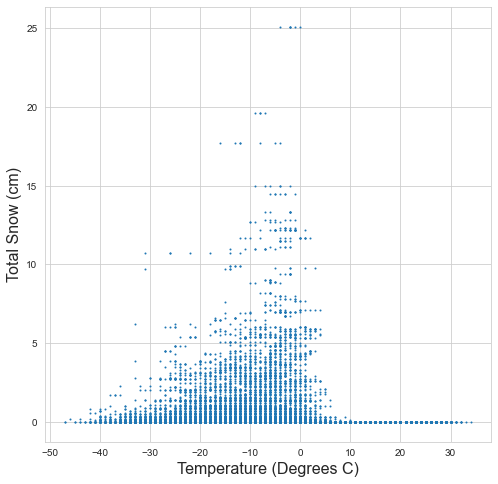

In [31]:
## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(alaska_train.tempC, alaska_train.totalSnow_cm,s=1)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Temperature (Degrees C)", fontsize =16)

## place a ylabel
plt.ylabel("Total Snow (cm)", fontsize = 16)

## type this to show the plot
plt.show()

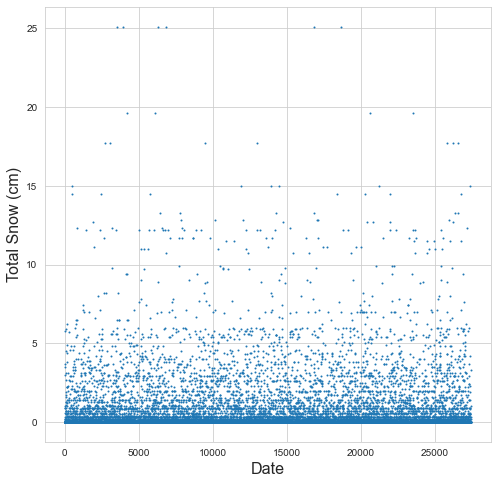

In [20]:
## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(range(len(alaska_train)),alaska_train.totalSnow_cm, s=1)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Date", fontsize =16)

## place a ylabel
plt.ylabel("Total Snow (cm)", fontsize = 16)

## type this to show the plot
plt.show()

In [27]:
#Seasonality
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

In [25]:
ses = SimpleExpSmoothing(alaska_train.totalSnow_cm.values)

C:\Users\AVM11\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [26]:
fit = ses.fit(smoothing_level=0.5, optimized=False)


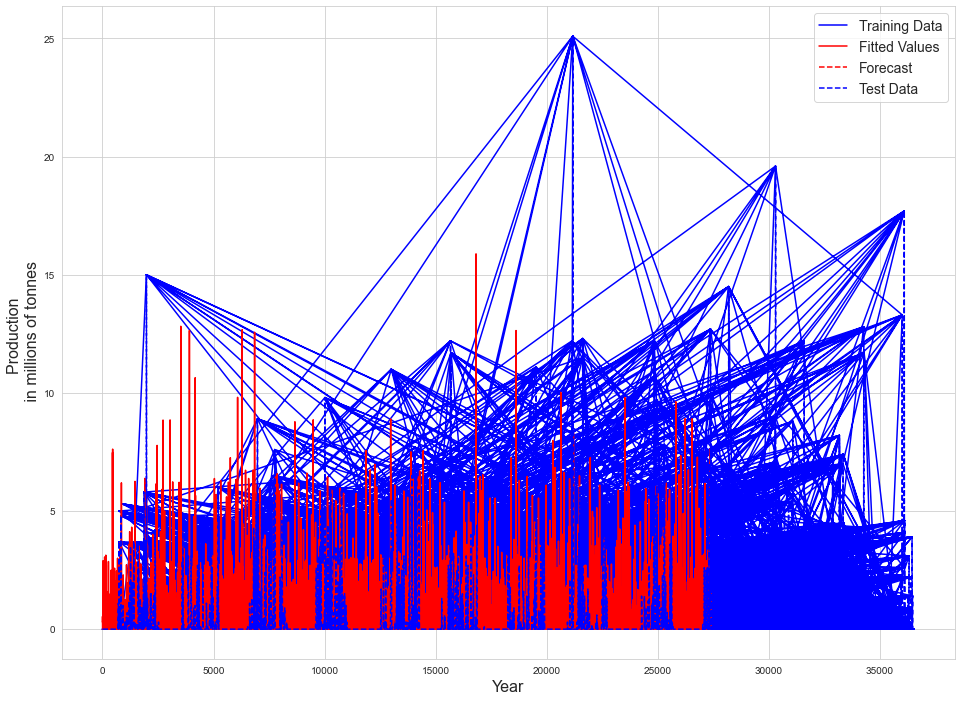

In [33]:
plt.figure(figsize=(16,12))

# plot the training data
plt.plot(alaska_train.totalSnow_cm,'b',
            label = "Training Data")

# plot the fit
plt.plot(fit.fittedvalues,'r-',
            label = "Fitted Values")

# plot the forecast
plt.plot(fit.forecast(len(alaska_train)),'r--',
            label = "Forecast")

plt.plot(alaska_test.totalSnow_cm,'b--',
            label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Year", fontsize=16)
plt.ylabel("Production \n in millions of tonnes", fontsize=16)

plt.show()